# Context:

The data based on the Hospital ED. There were big numbers of patients that were admitted to ED due to variety of Issues
    

# Questions

Business Question: How to educate patient to prevent Unnecessary ED visit?

Data Questions:
- What are the biggest number of diagnostic that occured in the Hospital ED?
- What are the most common departure status in the ED?
- Which diagnostic took longest average time of arrival and departure?
- Which diagnostic took longest average time of treatment and departure?

# Pipeline

1. Data Context
2. Questions
3. Data Loading
4. Data Cleaning
5. Summary and Solutions

# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# 2. Cleaning Data

In [2]:
# read the data
df = pd.read_excel('Worksheet in EY DnA Data challenge -.xlsx')
df.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619.0,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
1,444991,63193,4,15,2009-01-01 00:35:00,2009-01-01 03:01:00,2009-01-01 07:35:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,420,274.0,9000.0,INJURY,Z53.2,DID NOT WAIT
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0.0,7000.0,EYE,H10.9,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,98,26.0,25000.0,PAIN,H60.9,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,274,119.0,9000.0,INJURY,S83.6,KNEE SPRAIN / STRAIN


In [3]:
# check the data type
df.dtypes

MRN                                               int64
Presentation Visit Number                         int64
Triage Priority                                   int64
 Age  (yrs)                                       int64
Arrival Date                             datetime64[ns]
Dr Seen Date                             datetime64[ns]
Depart Actual Date                       datetime64[ns]
Depart Status Code                               object
Departure Status Desc.                           object
Depart. Dest. Code                               object
Depart. Dest. Desc.                              object
TimeDiff Arrival-Actual Depart (mins)             int64
TimeDiff TreatDrNr-Act. Depart (mins)           float64
Presenting Complaint Code                       float64
Presenting Complaint Desc.                       object
Diag Code                                        object
Diagnosis Desc.                                  object
dtype: object

In [4]:
# data shape
df.shape

(30188, 17)

In [5]:
# check for null value

df.isnull().sum()

MRN                                        0
Presentation Visit Number                  0
Triage Priority                            0
 Age  (yrs)                                0
Arrival Date                               0
Dr Seen Date                             184
Depart Actual Date                         0
Depart Status Code                         0
Departure Status Desc.                     0
Depart. Dest. Code                         0
Depart. Dest. Desc.                        0
TimeDiff Arrival-Actual Depart (mins)      0
TimeDiff TreatDrNr-Act. Depart (mins)      1
Presenting Complaint Code                 19
Presenting Complaint Desc.                19
Diag Code                                  0
Diagnosis Desc.                            0
dtype: int64

In [6]:
df.columns

Index(['MRN', 'Presentation Visit Number', 'Triage Priority', ' Age  (yrs)',
       'Arrival Date', 'Dr Seen Date', 'Depart Actual Date',
       'Depart Status Code', 'Departure Status Desc.', 'Depart. Dest. Code',
       'Depart. Dest. Desc.', 'TimeDiff Arrival-Actual Depart (mins)',
       'TimeDiff TreatDrNr-Act. Depart (mins)', 'Presenting Complaint Code',
       'Presenting Complaint Desc.', 'Diag Code', 'Diagnosis Desc.'],
      dtype='object')

In [7]:
df['Presenting Complaint Code'].value_counts()

24000.0    10300
9000.0      6125
32000.0     2183
25000.0     1923
6000.0      1447
           ...  
13009.0        1
21017.0        1
21025.0        1
23007.0        1
3003.0         1
Name: Presenting Complaint Code, Length: 170, dtype: int64

In [8]:
# Replace null values for presenting complaint code
df['Presenting Complaint Code'].fillna(24000, inplace = True)

In [9]:
df['Presenting Complaint Desc.'].value_counts()

PAEDIATRIC                     10300
INJURY                          6125
PAIN                            2289
RESPIRATORY                     2183
ENVIRONMENTAL / TEMPERATURE     1447
                               ...  
TEARING                            1
INHALATION OF                      1
UROGENITAL                         1
MEDICATION ONLY                    1
UNSTEADY                           1
Name: Presenting Complaint Desc., Length: 148, dtype: int64

In [10]:
# fill null values for presenting complain desc.
df['Presenting Complaint Desc.'].fillna('PAEDIATRIC', inplace = True)

In [11]:
df.isnull().sum()

MRN                                        0
Presentation Visit Number                  0
Triage Priority                            0
 Age  (yrs)                                0
Arrival Date                               0
Dr Seen Date                             184
Depart Actual Date                         0
Depart Status Code                         0
Departure Status Desc.                     0
Depart. Dest. Code                         0
Depart. Dest. Desc.                        0
TimeDiff Arrival-Actual Depart (mins)      0
TimeDiff TreatDrNr-Act. Depart (mins)      1
Presenting Complaint Code                  0
Presenting Complaint Desc.                 0
Diag Code                                  0
Diagnosis Desc.                            0
dtype: int64

In [12]:
# drop na subset
df.dropna(subset = ['Dr Seen Date', 'TimeDiff TreatDrNr-Act. Depart (mins)'], inplace = True)
df.shape

(30004, 17)

In [13]:
df.isnull().sum()

MRN                                      0
Presentation Visit Number                0
Triage Priority                          0
 Age  (yrs)                              0
Arrival Date                             0
Dr Seen Date                             0
Depart Actual Date                       0
Depart Status Code                       0
Departure Status Desc.                   0
Depart. Dest. Code                       0
Depart. Dest. Desc.                      0
TimeDiff Arrival-Actual Depart (mins)    0
TimeDiff TreatDrNr-Act. Depart (mins)    0
Presenting Complaint Code                0
Presenting Complaint Desc.               0
Diag Code                                0
Diagnosis Desc.                          0
dtype: int64

In [14]:
df.columns

Index(['MRN', 'Presentation Visit Number', 'Triage Priority', ' Age  (yrs)',
       'Arrival Date', 'Dr Seen Date', 'Depart Actual Date',
       'Depart Status Code', 'Departure Status Desc.', 'Depart. Dest. Code',
       'Depart. Dest. Desc.', 'TimeDiff Arrival-Actual Depart (mins)',
       'TimeDiff TreatDrNr-Act. Depart (mins)', 'Presenting Complaint Code',
       'Presenting Complaint Desc.', 'Diag Code', 'Diagnosis Desc.'],
      dtype='object')

In [15]:
# Renaming columns (replacing dots)
for col in df.columns:
    df.rename(columns = {
        col:col.replace(".", "")
    }, inplace = True)
df.columns

Index(['MRN', 'Presentation Visit Number', 'Triage Priority', ' Age  (yrs)',
       'Arrival Date', 'Dr Seen Date', 'Depart Actual Date',
       'Depart Status Code', 'Departure Status Desc', 'Depart Dest Code',
       'Depart Dest Desc', 'TimeDiff Arrival-Actual Depart (mins)',
       'TimeDiff TreatDrNr-Act Depart (mins)', 'Presenting Complaint Code',
       'Presenting Complaint Desc', 'Diag Code', 'Diagnosis Desc'],
      dtype='object')

In [16]:
# Renaming column
df.rename(columns = {
    ' Age  (yrs)': 'Age (yrs)',
    'TimeDiff Arrival-Actual Depart (mins)': 'Time Diff Arrival-Actual Depart (mins)',
    'TimeDiff TreatDrNr-Act Depart (mins)': 'TimeDiff Treat DrNr-Act Depart (mins)'
}, inplace = True)
df.columns

Index(['MRN', 'Presentation Visit Number', 'Triage Priority', 'Age (yrs)',
       'Arrival Date', 'Dr Seen Date', 'Depart Actual Date',
       'Depart Status Code', 'Departure Status Desc', 'Depart Dest Code',
       'Depart Dest Desc', 'Time Diff Arrival-Actual Depart (mins)',
       'TimeDiff Treat DrNr-Act Depart (mins)', 'Presenting Complaint Code',
       'Presenting Complaint Desc', 'Diag Code', 'Diagnosis Desc'],
      dtype='object')

In [17]:
df.duplicated(subset=['MRN'])

0        False
1        False
2        False
3        False
4        False
         ...  
30183    False
30184    False
30185     True
30186     True
30187    False
Length: 30004, dtype: bool

In [18]:
df.drop_duplicates('MRN', keep = False, inplace = True)
df.duplicated(subset=['MRN'])

0        False
2        False
3        False
4        False
5        False
         ...  
30181    False
30182    False
30183    False
30184    False
30187    False
Length: 14553, dtype: bool

In [19]:
df.shape

(14553, 17)

# 3. EDA

In [20]:
df.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc,Depart Dest Code,Depart Dest Desc,Time Diff Arrival-Actual Depart (mins),TimeDiff Treat DrNr-Act Depart (mins),Presenting Complaint Code,Presenting Complaint Desc,Diag Code,Diagnosis Desc
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619.0,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0.0,7000.0,EYE,H10.9,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,98,26.0,25000.0,PAIN,H60.9,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,274,119.0,9000.0,INJURY,S83.6,KNEE SPRAIN / STRAIN
5,445004,63233,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,109,9.0,9000.0,INJURY,S01.88,LACERATED FACE


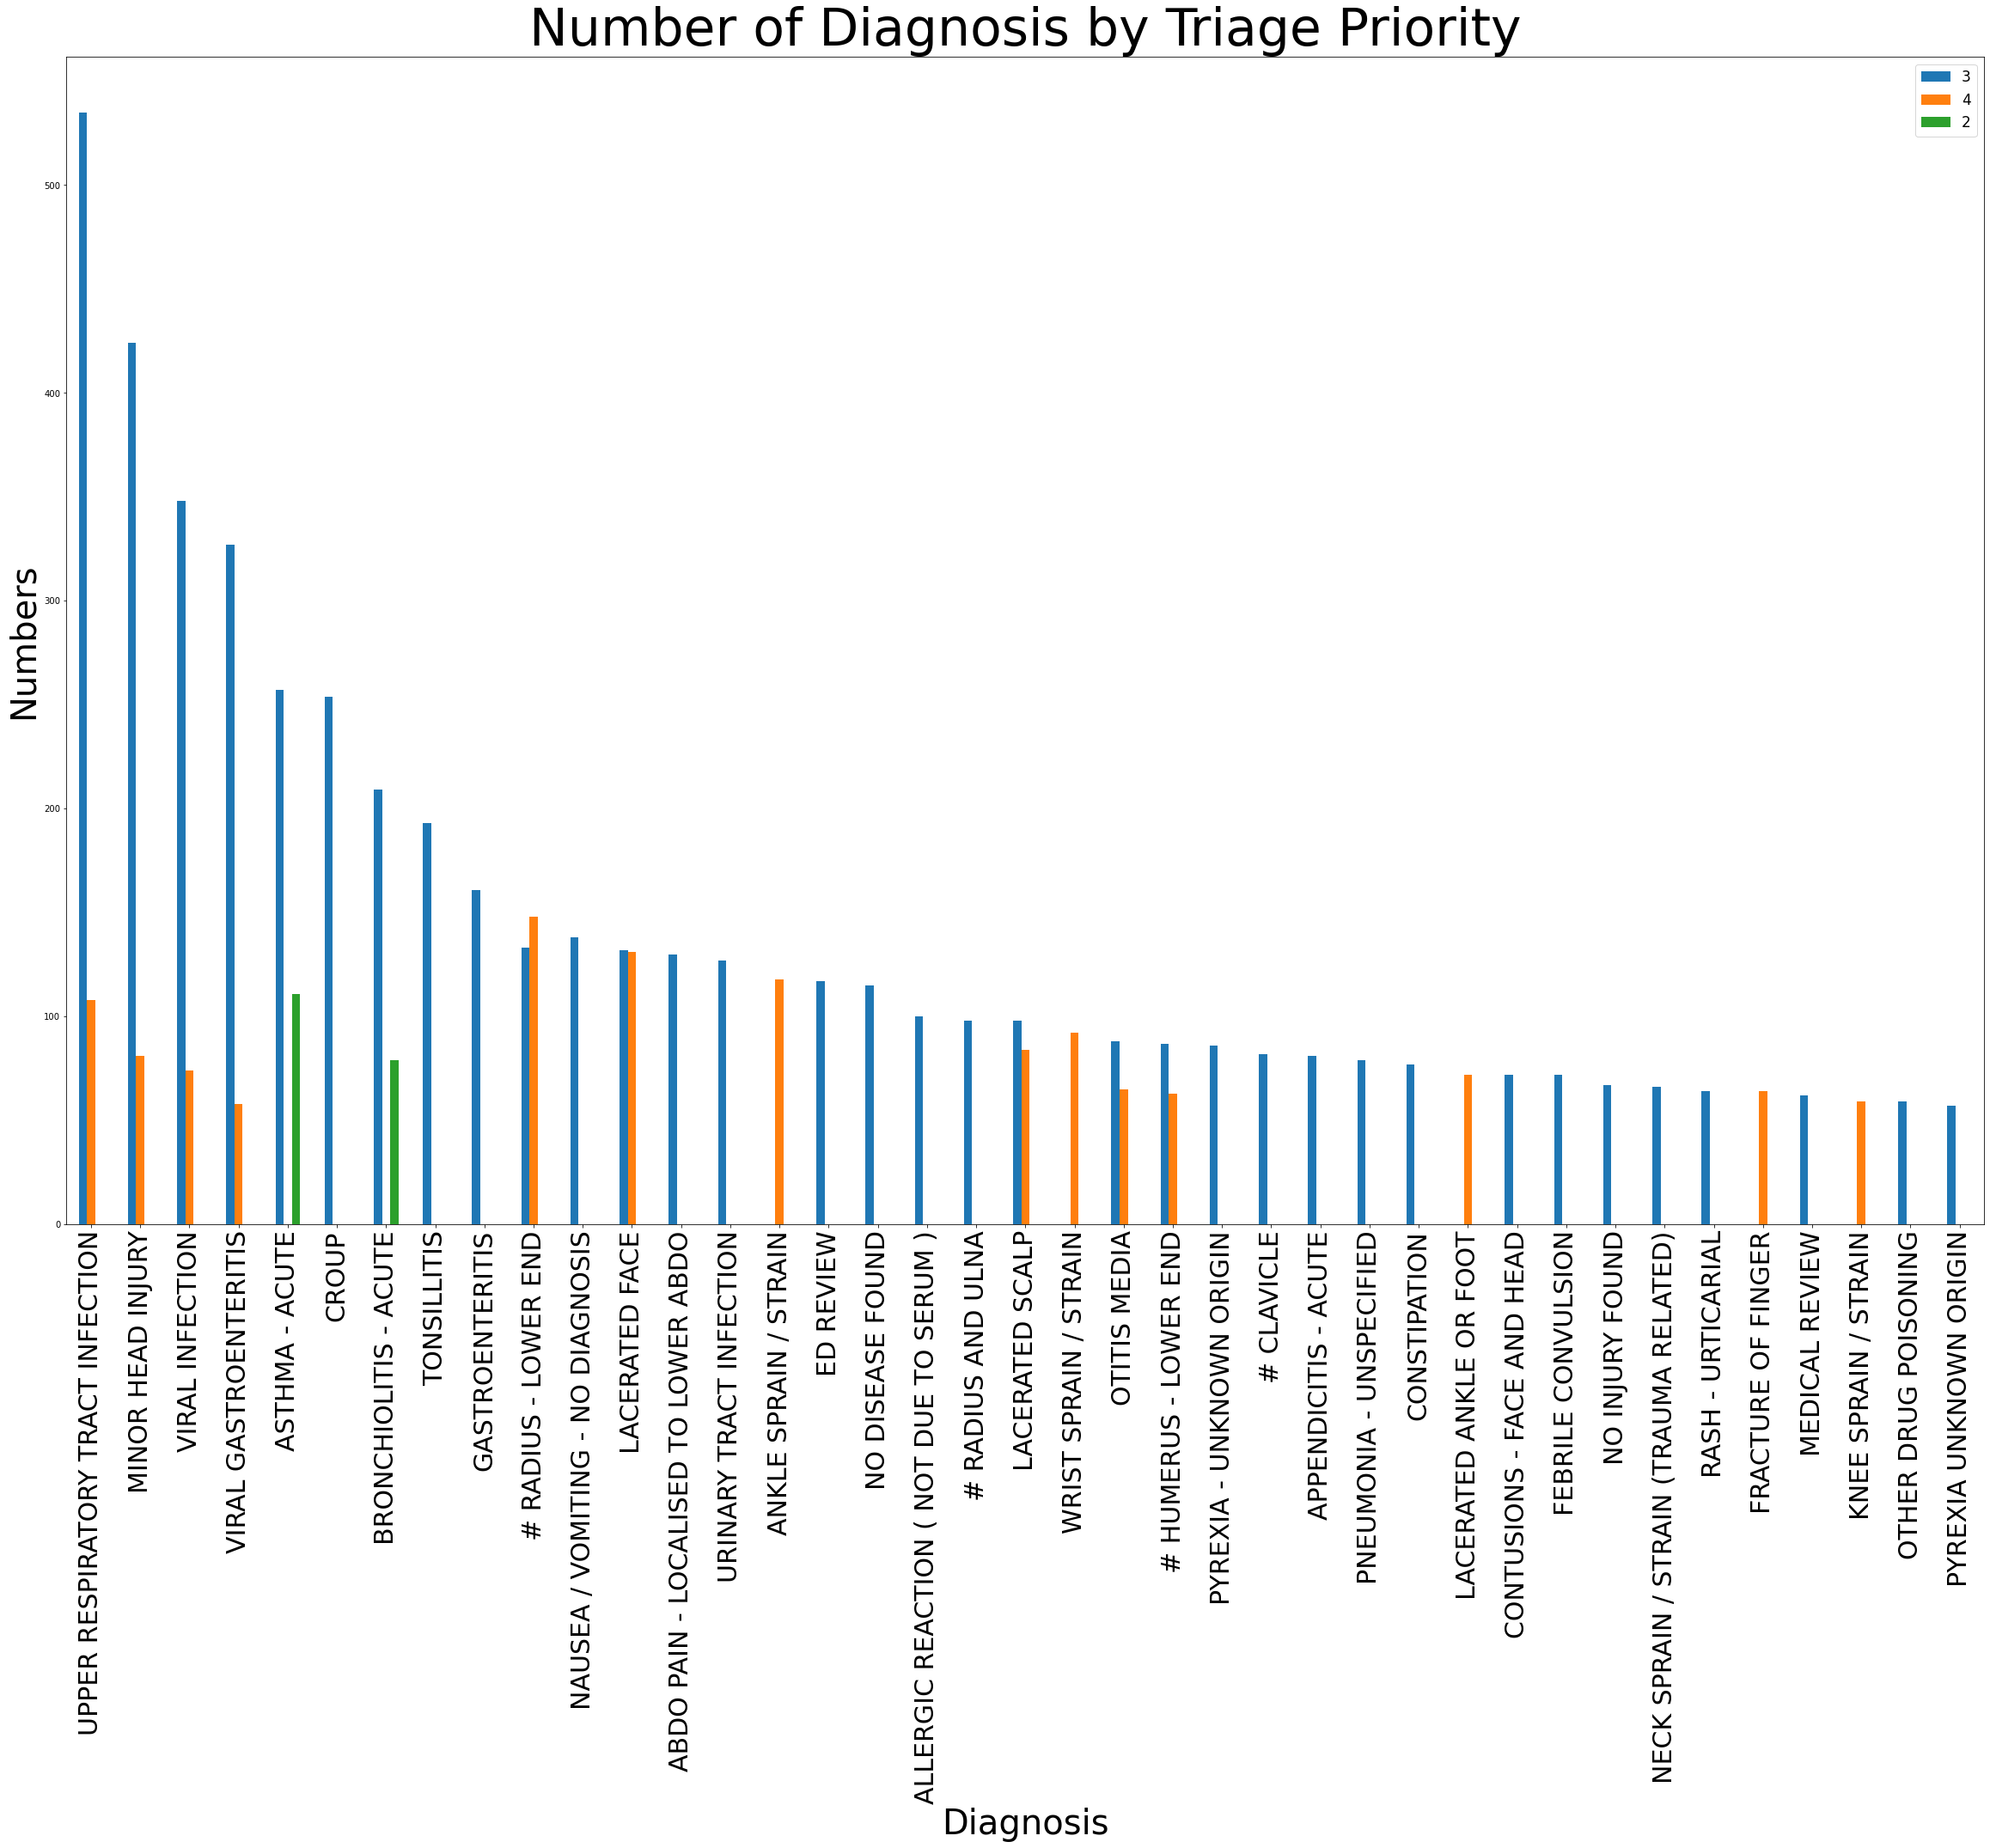

In [21]:
diagnosis_priority = df[df['Diagnosis Desc'] != 'DID NOT WAIT'].groupby(['Diagnosis Desc', 'Triage Priority'])['MRN'].count().sort_values(ascending = False).head(50)

diagnosis_priority.unstack(1).plot(kind = 'bar', figsize = (40,25))
plt.xlabel('Diagnosis', fontsize = 40)
plt.ylabel('Numbers', fontsize = 40)
plt.xticks(fontsize = 30)
plt.title('Number of Diagnosis by Triage Priority', fontsize = 60)
plt.legend(loc = 'upper right', fontsize = 17)
plt.show()

Insight: Majority of the patient that came / was admitted to the ED were diagnosed with upper respitory tract infection.

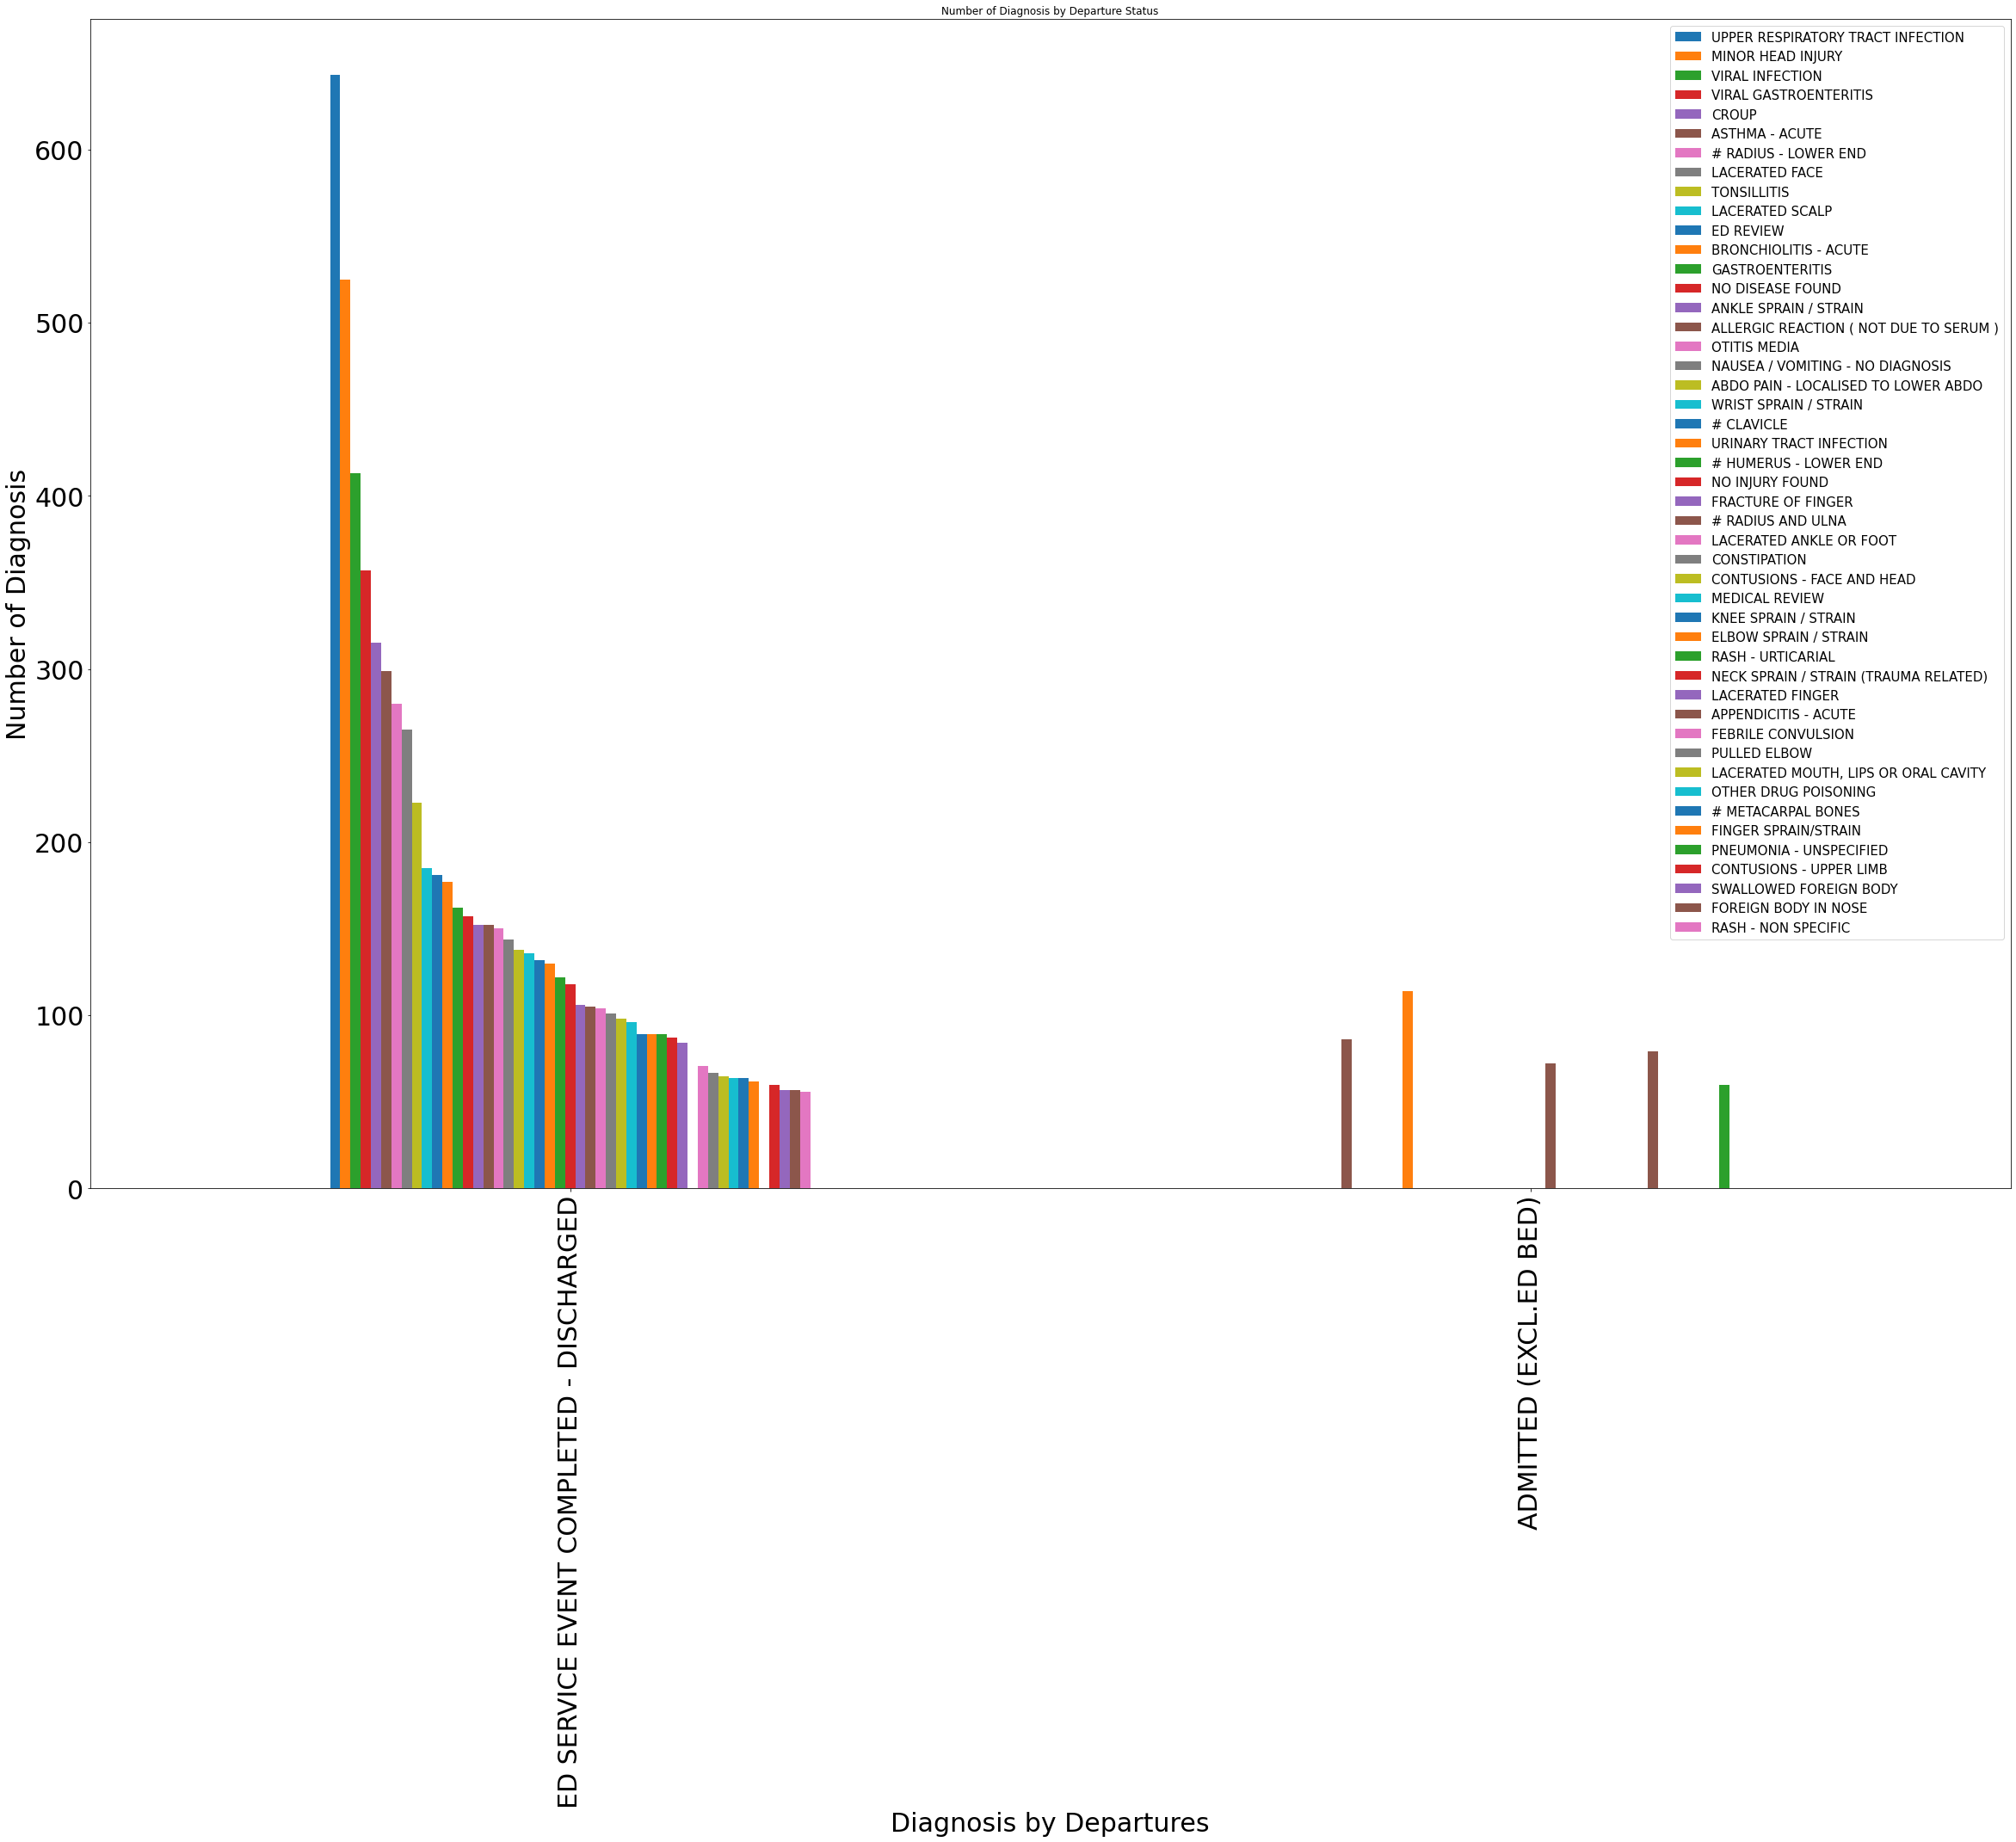

In [23]:
departure_stats_by_diagnosis = df[df['Diagnosis Desc'] != 'DID NOT WAIT'].groupby(['Departure Status Desc', 'Diagnosis Desc'])['MRN'].count().sort_values(ascending = False).head(50)
departure_stats_by_diagnosis.unstack(1).plot(kind = 'bar', figsize = (40,25))
plt.xlabel('Diagnosis by Departures', fontsize = 30)
plt.xticks(fontsize = 30)
plt.ylabel('Number of Diagnosis', fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Number of Diagnosis by Departure Status')
plt.legend(loc = 'upper right', fontsize = 15)

Insights:The most common departure in the ED is the status discharged status with the diagnosis such as minor head injury, upper respitory tract infection, viral infection, viral gastroentretis etc.

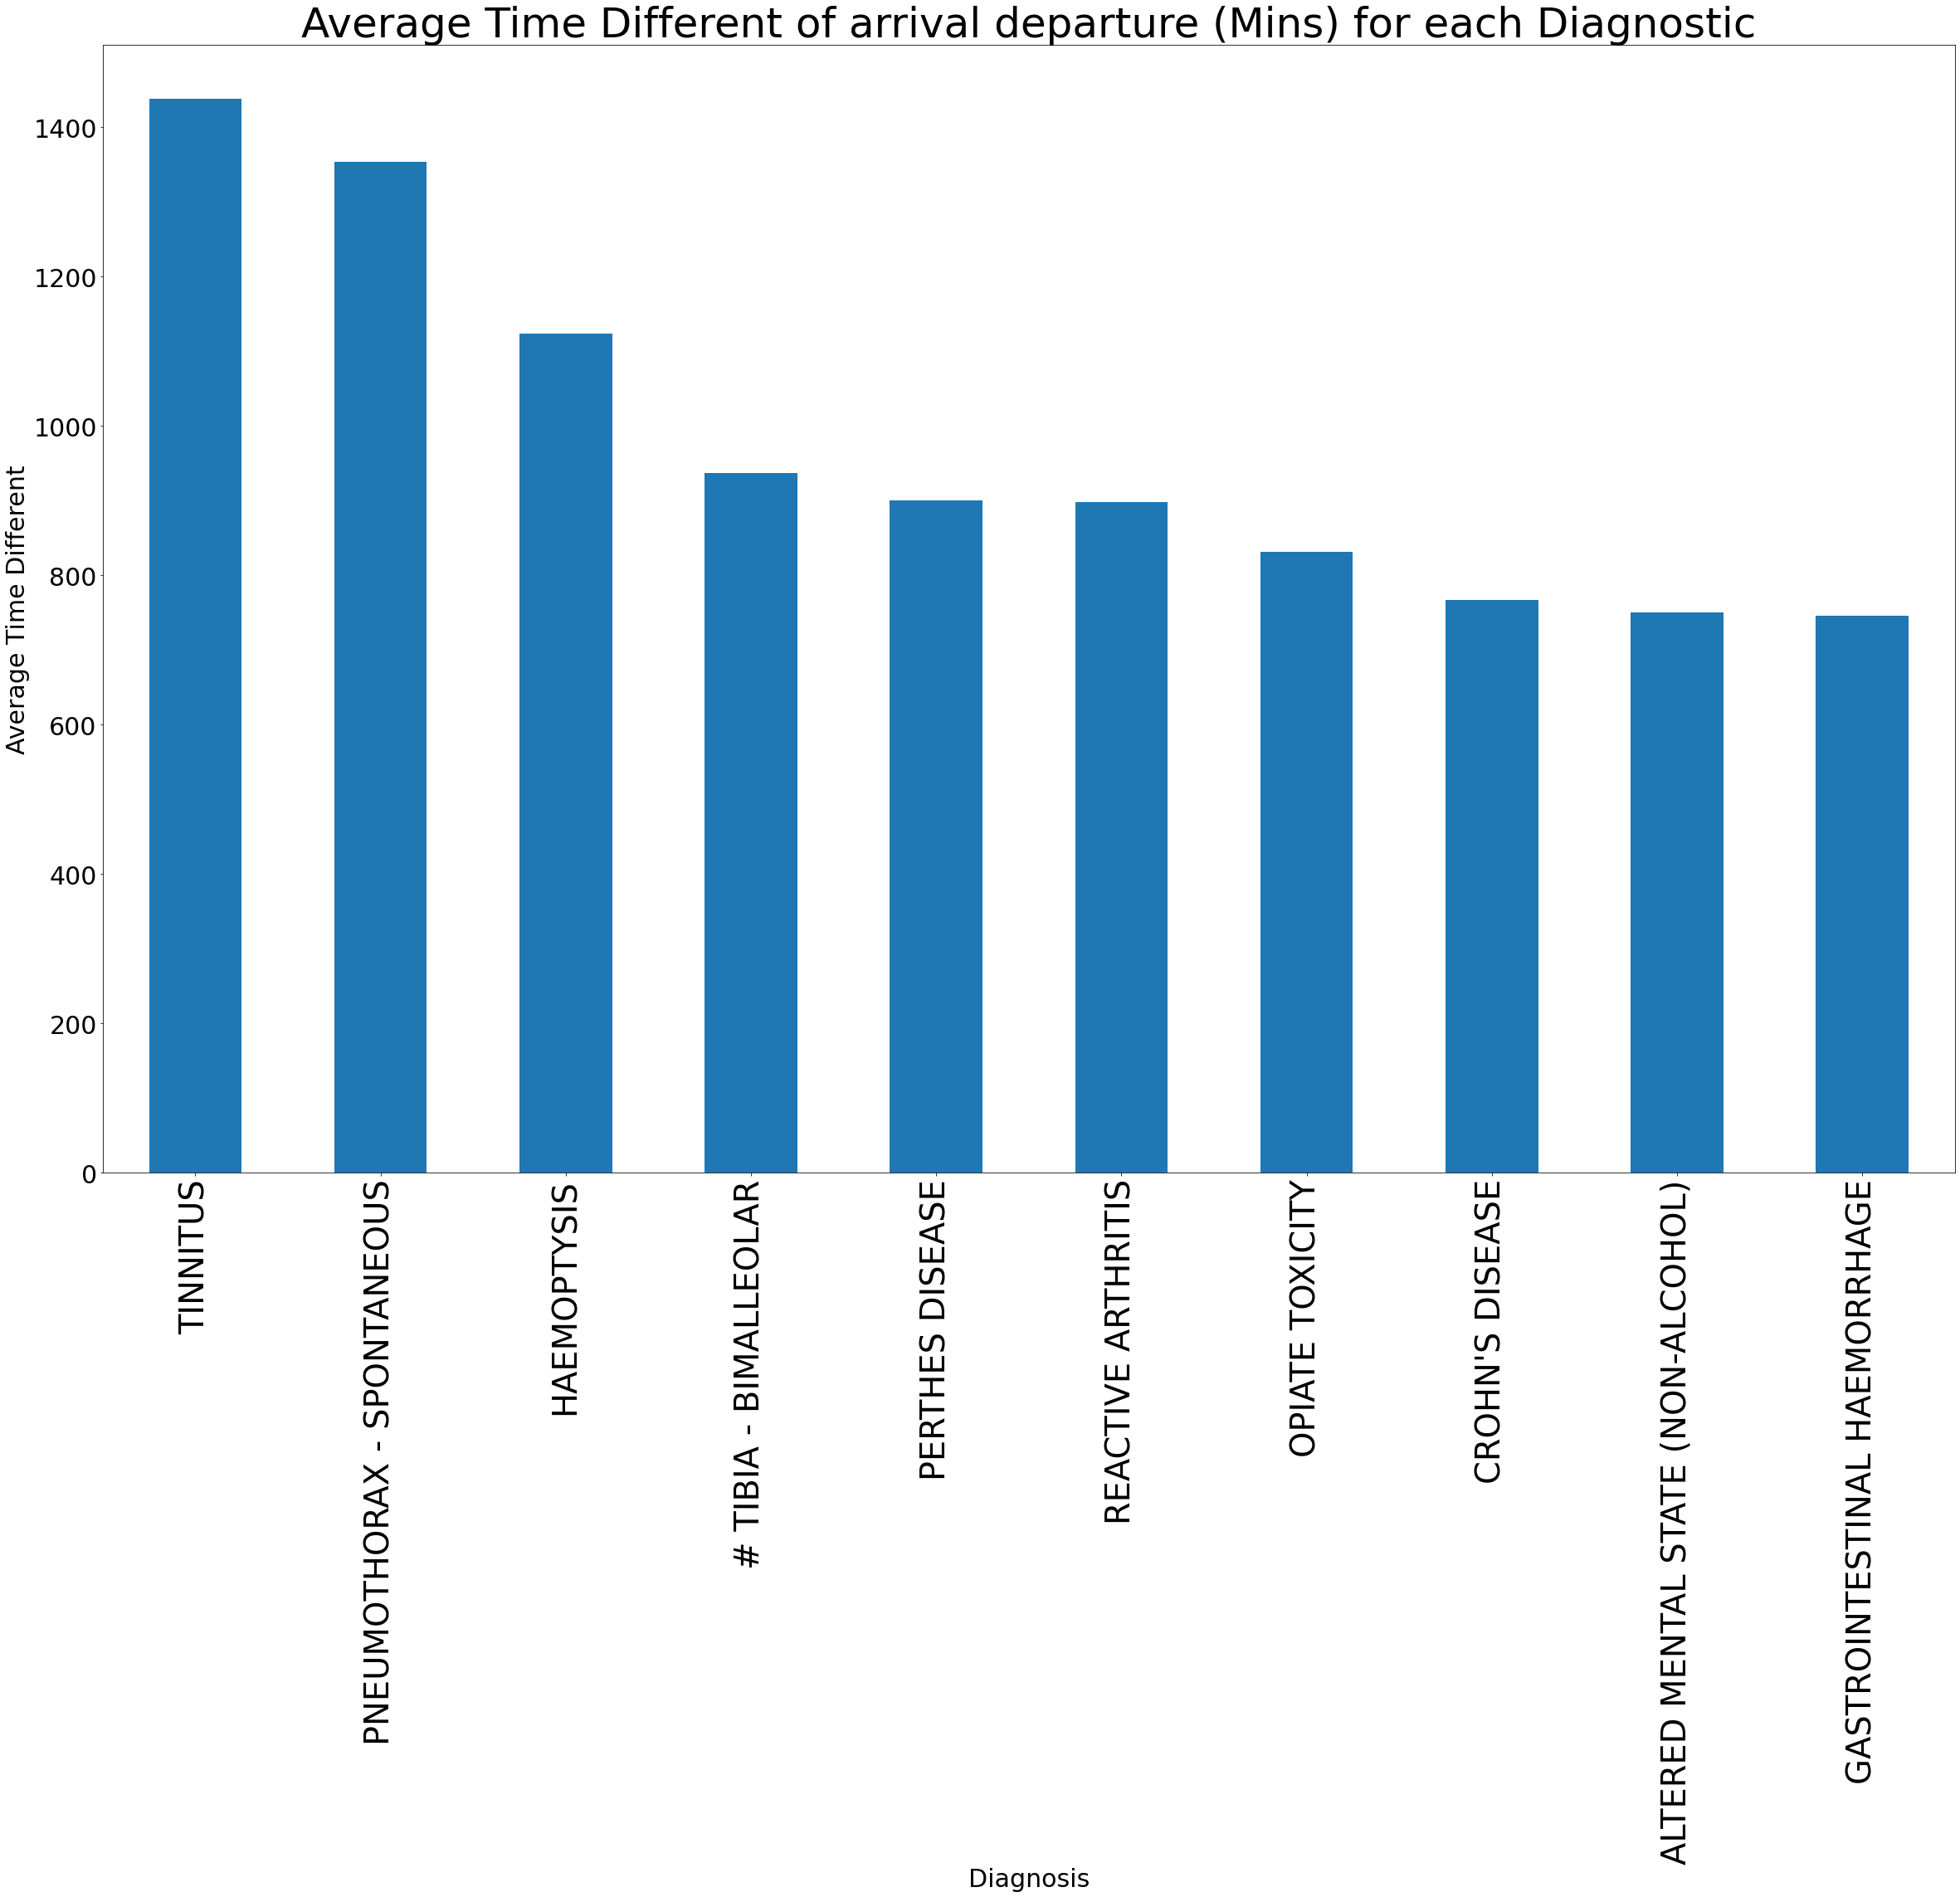

In [24]:
arrival_depart_avg  = df[df['Diagnosis Desc'] != 'DID NOT WAIT'].groupby(['Diagnosis Desc'])['Time Diff Arrival-Actual Depart (mins)'].mean().sort_values(ascending = False).head(10)
arrival_depart_avg.plot(kind = 'bar', figsize = (40,25))

plt.xlabel('Diagnosis', fontsize = 30)
plt.xticks(fontsize = 40)
plt.ylabel('Average Time Different', fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Average Time Different of arrival departure (Mins) for each Diagnostic', fontsize = 50)
plt.show()


Insights: Tinnitus has the longest average time between arrival and departure time.

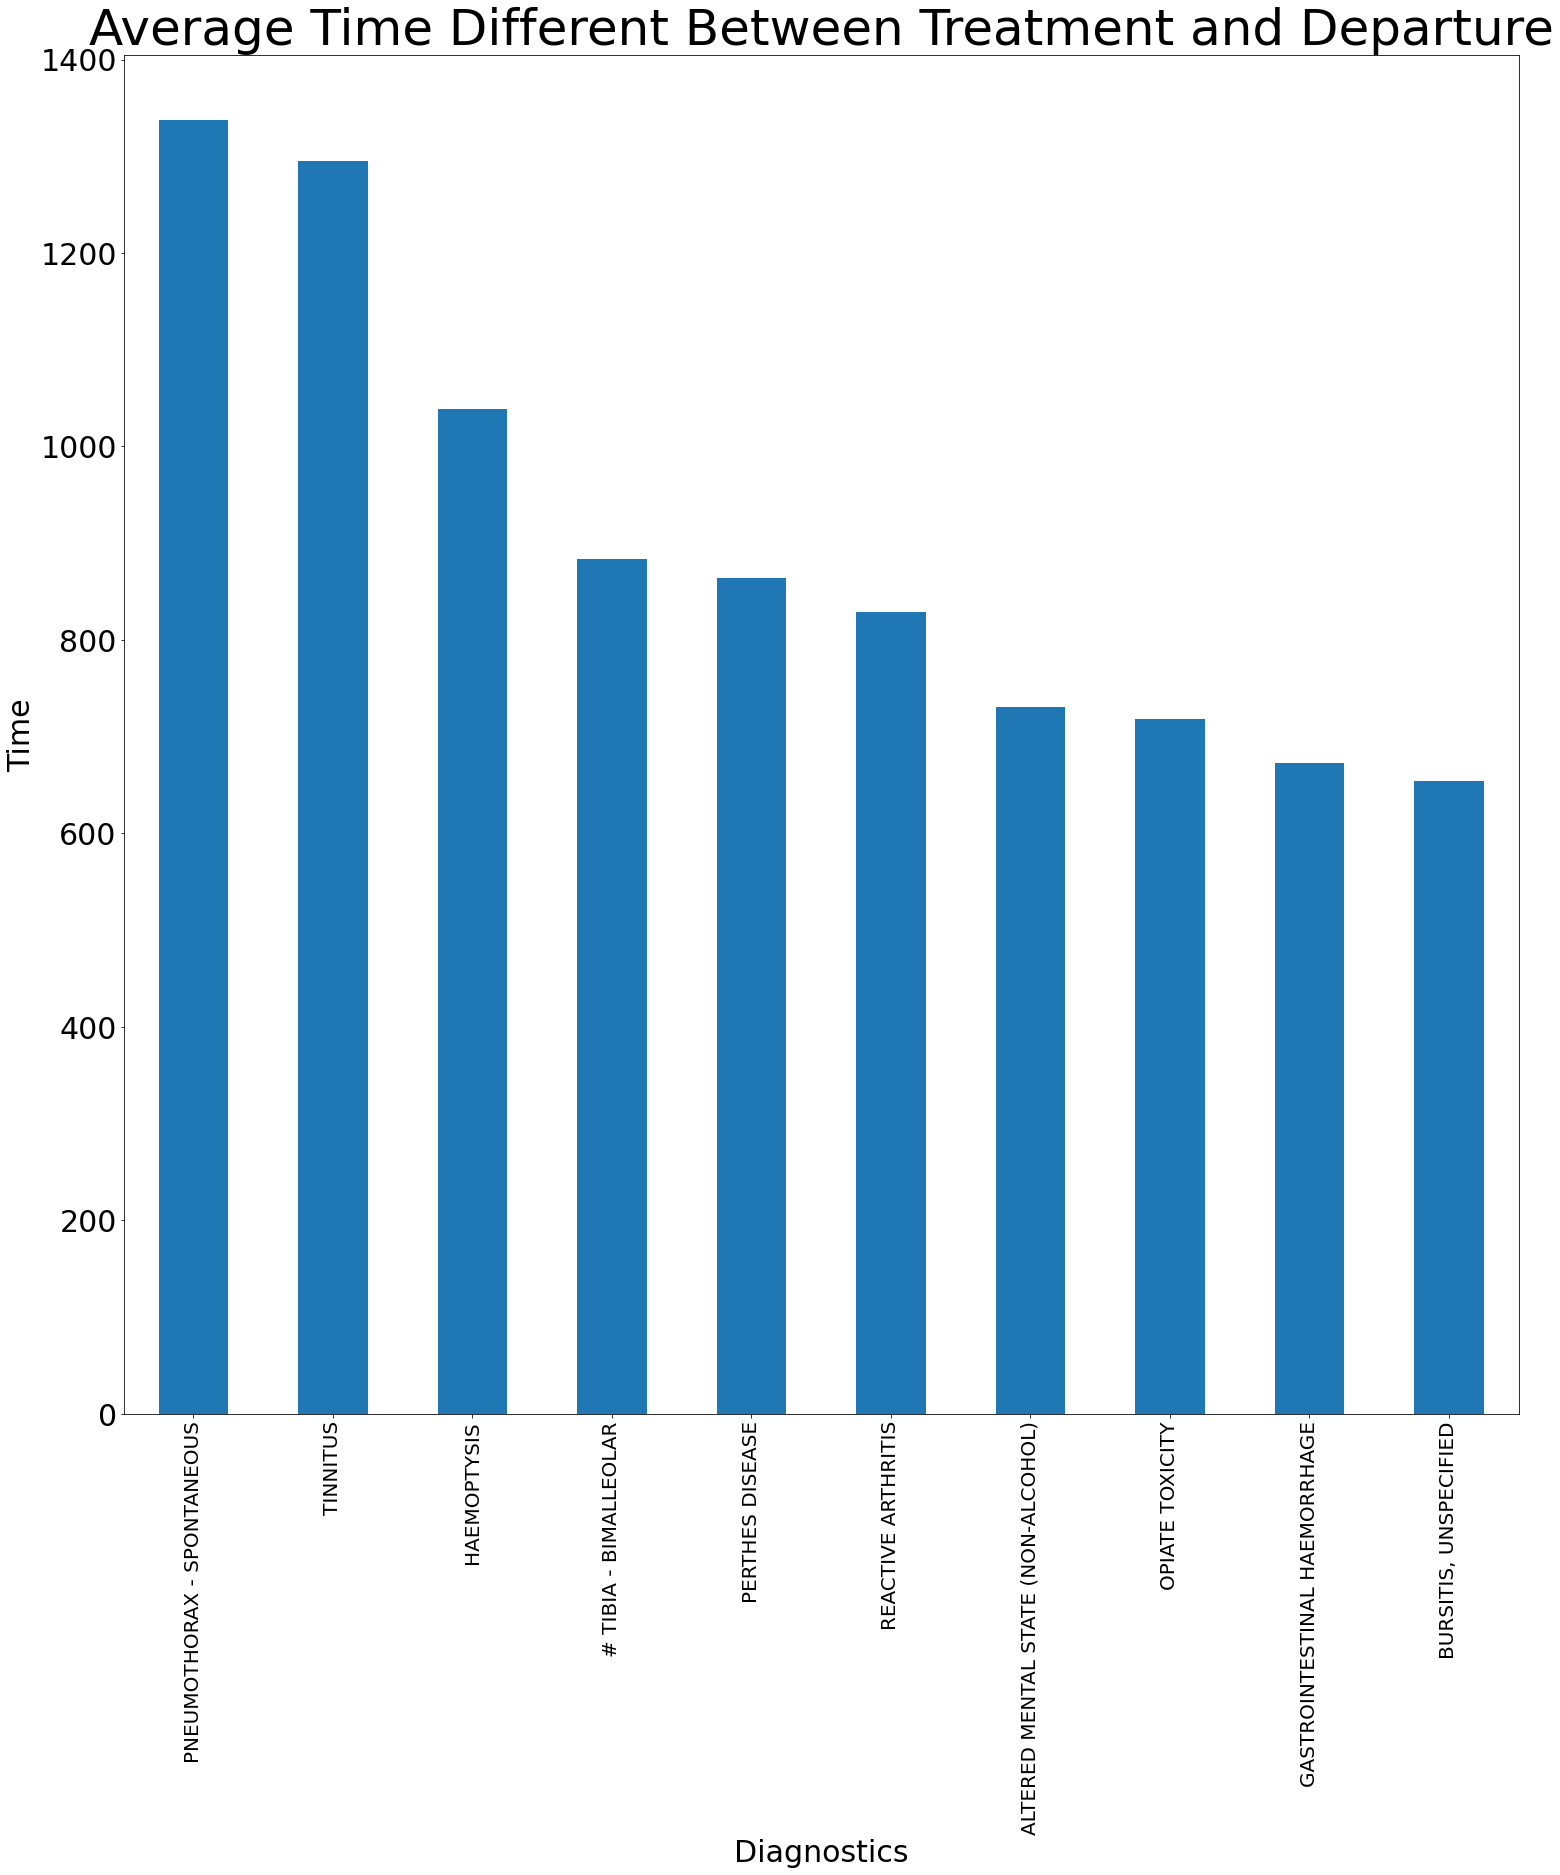

In [30]:
treatment_depart_avg = df[df['Diagnosis Desc'] != 'DID NOT WAIT'].groupby(['Diagnosis Desc'])['TimeDiff Treat DrNr-Act Depart (mins)'].mean().sort_values(ascending = False).head(10)
treatment_depart_avg.plot(kind = 'bar', figsize = (25,25))
plt.xlabel('Diagnostics', fontsize = 30)
plt.xticks(fontsize = 20)
plt.ylabel('Time', fontsize = 30)
plt.yticks(fontsize = 30)
plt.title('Average Time Different Between Treatment and Departure', fontsize = 50)
plt.show()

Insights: Pneumothorax has the longest average time between treatment departure.

# Summary:

Insights:
- Majority of the patient that came / was admitted to the ED were diagnosed with upper respitory tract infection.
- Tinnitus has the longest average time between arrival and departure time.
- Pneumothorax has the longest average time between treatment and departure.
- The most common departure in the ED is the status discharged status with the diagnosis such as minor head injury, upper respitory tract infection, viral infection, viral gastroentretis etc.

# Solutions

How reduce unnecessary ED Visits:
- Create a campaign to patient such as calling the MD before heading to the ED
- Develops a hands to patients where written instructions said Call Your Doctor's Office, Go to Urgent Care and Go to the ER
- Provide condition specific follow up guidance to paitnes
- Promote the use of personal health triage applications.
- Offer telehealth as an alternative to the ED